# Regresión Lineal
**Diego Díaz Fonseca**

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Funciones auxiliares

In [ ]:
def MSE(y_true, y_predict):
  square_error = (y_predict - y_true)**2
  return (1/y_true.shape[0])*square_error.sum()

def MSE_weight_change(y_true, y_predict, data):
  transposed_residuals = (y_predict - y_true).transpose()
  return (2/y.shape[0]) * (np.dot(transposed_residuals, data)).transpose()

def MAE(y_true, y_predict):
  abs_error = (y_predict - y_true).abs()
  return (1/y_true.shape[0])*abs_error.sum()

def MAE_weight_change(y_true, y_predict, data):
  transposed_residuals = (y_predict - y_true).transpose()
  f = lambda diff: 1 if diff>0 else (-1 if diff < 0 else 0)
  v = (np.dot(transposed_residuals.apply(f), data)).transpose()
  return (1/y.shape[0]) * v

def l1(weights):
  return weights.abs().sum()

def l2(weights):
  return (weights ** 2).sum()

def l1_change(weights, lambdaa):
  return np.ones_like(weights) * lambdaa

def l2_change(weights, lambdaa):
  return 2 * np.ones_like(weights) * lambdaa * weights

def score(y_true, y_predict):
  residual_squares = (y_true - y_predict)**2
  total_squares    = (y_true - y_true.mean())**2
  return 1 - residual_squares.sum()/total_squares.sum()

## Implementación del modelo

In [ ]:
class LinearRegression:
  def __init__(self):
    self.c = None
    self.used_epochs = 0
    self.error_history = []
    self.error_used = ""

  def fit(self, x, y, max_epochs=100, threshold=0.01, learning_rate=0.001, momentum=0, decay=0, error='mse', regularization='none', lambdaa=0):
    self.error_history = []
    self.error_used = error
    data = x.copy()
    data.insert(loc=0, column='C0', value=1)
    self.c = pd.Series(np.random.randn(data.shape[1]))
    current_epoch = 0
    current_error = float("inf")
    previous_weight_change = np.zeros_like(self.c)
    error_function, weight_change_function = self.__getErrorFunction(error)
    regularization_function, regularization_change_function = self.__getRegularizationFunction(error)
    
    while current_epoch <= max_epochs and current_error > threshold:
      y_predicted   = np.dot(data, self.c)
      current_error = error_function(y, y_predicted) + lambdaa * regularization_function(self.c)
      self.error_history.append(current_error)

      weight_change = weight_change_function(y, y_predicted, data) + regularization_change_function(self.c, lambdaa)
      
      self.c -= learning_rate * (weight_change + momentum * previous_weight_change)
      previous_weight_change = weight_change
      
      learning_rate *= 1/(1+decay)
      current_epoch += 1

    self.used_epochs = current_epoch
    return current_error

  def __getRegularizationFunction(self, regularization_name):
    if   regularization_name == "l1" or regularization_name == "lasso": 
      return l1, l1_change
    elif regularization_name == "l2" or regularization_name == "ridge": 
      return l2, l2_change
    
    return lambda x: 0, lambda x,y: 0

  def __getErrorFunction(self, error_name):
    if   error_name == "mse": return MSE, MSE_weight_change
    elif error_name == "mae": return MAE, MAE_weight_change
    raise ValueError(error_name + " no es una función de error válida.")

  def predict(self, x):
    if self.c is None: raise AssertionError("El modelo no ha sido entrenado.")
    data = x.copy()
    data.insert(loc=0, column='C0', value=1)
    return np.dot(data, self.c)

  def plot_error_metric(self):
    plt.plot(range(1, self.used_epochs+1), self.error_history)
    plt.xscale("log")
    plt.yscale("log")
    plt.title('Error durante el entrenamiento')
    plt.xlabel('Epochs')
    plt.ylabel(self.error_used.upper())
    plt.show()

## Pruebas

**Para cada prueba calcule e imprima el error R2
Realice la prueba con múltiples combinaciones de parámetros, intentando mejorar la estimación**

### Conseguir información

In [ ]:
data = pd.read_csv("fish_perch.csv")
data.dropna(inplace=True)
data.head()

,Weight,Length1,Length2,Length3,Height,Width
0,5.9,7.5,8.4,8.8,2.1120,1.4080
1,32.0,12.5,13.7,14.7,3.5280,1.9992
2,40.0,13.8,15.0,16.0,3.8240,2.4320
3,51.5,15.0,16.2,17.2,4.5924,2.6316
4,70.0,15.7,17.4,18.5,4.5880,2.9415


### Dividir la información

In [ ]:
X = data.iloc[:,[0,1,2,3,5]]
y = data.iloc[:,4] # Height
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

### Entrenar el modelo con diferentes hiperparámetros

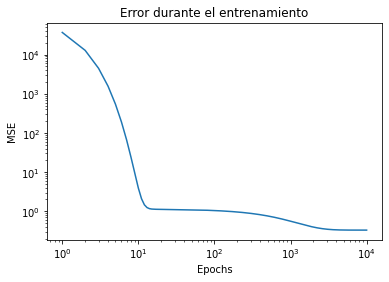

Ultimo error:  0.3292007069700671


In [ ]:
LR = LinearRegression()
last_error = LR.fit(
    X_train, y_train, max_epochs=1e4, threshold=0.01,
    learning_rate=1e-6, momentum=1e-4, decay=1e-8,
    error='mse', regularization='l1', lambdaa=6
)
LR.plot_error_metric()
print("Ultimo error: ", last_error)

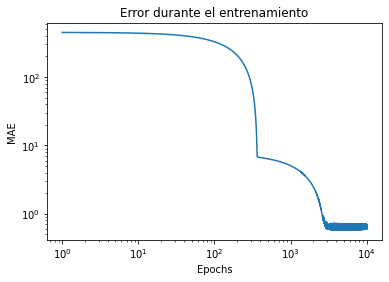

Ultimo error:  0.6421618018530921


In [ ]:
LR2 = LinearRegression()
last_error = LR2.fit(
    X_train, y_train, max_epochs=1e4, threshold=0.01,
    learning_rate=1e-5, momentum=1e-2, decay=1e-7,
    error='mae', regularization='l2', lambdaa=2
)
LR2.plot_error_metric()
print("Ultimo error: ", last_error)

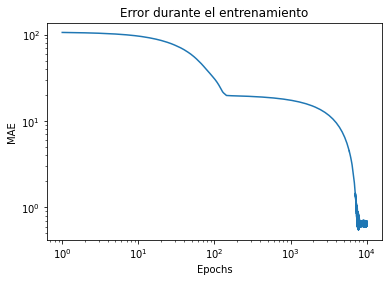

Ultimo error:  0.6712658028616766


In [ ]:
LR3 = LinearRegression()
last_error = LR3.fit(
    X_train, y_train, max_epochs=1e4, threshold=0.01,
    learning_rate=1e-5, momentum=1e-8, decay=1e-8,
    error='mae', regularization='l1', lambdaa=1e-8
)
LR3.plot_error_metric()
print("Ultimo error: ", last_error)

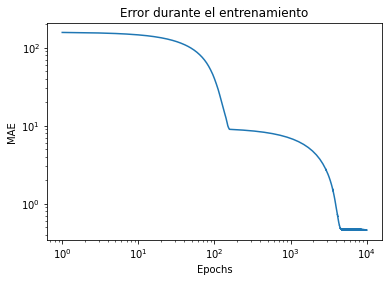

Ultimo error:  0.4590472015272727


In [ ]:
LR4 = LinearRegression()
last_error = LR4.fit(
    X_train, y_train, max_epochs=1e4, threshold=0.01,
    learning_rate=1e-5, momentum=1e-11, decay=1e-4,
    error='mae', regularization='l1', lambdaa=1e-8
)
LR4.plot_error_metric()
print("Ultimo error: ", last_error)

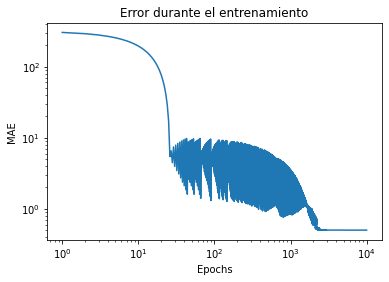

Ultimo error:  0.5024129203071247


In [ ]:
LR5 = LinearRegression()
last_error = LR5.fit(
    X_train, y_train, max_epochs=1e4, threshold=0.01,
    learning_rate=1e-4, momentum=1e-11, decay=1e-3,
    error='mae', regularization='none', lambdaa=0
)
LR5.plot_error_metric()
print("Ultimo error: ", last_error)

### Probar los modelos

In [ ]:
predictions = LR.predict(X_test)
score(y_test, predictions)

-60.114699155984

In [ ]:
predictions = LR2.predict(X_test)
score(y_test, predictions)

0.9764517658600288

In [ ]:
predictions = LR3.predict(X_test)
score(y_test, predictions)

0.845735488210601

In [ ]:
predictions = LR4.predict(X_test)
score(y_test, predictions)

0.978050038587591

In [ ]:
predictions = LR5.predict(X_test)
score(y_test, predictions)

0.9698902101122153

**¡El mejor modelo fue el primero!**

### Probar el mejor modelo con diferentes divisiones test/train

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25, random_state=69)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=420)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
model = LR2

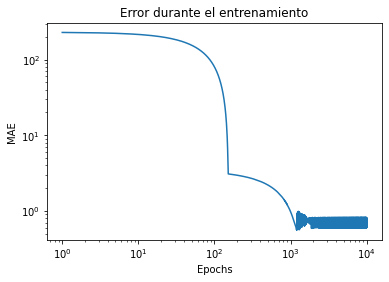

0.9156837156696926

In [ ]:
last_error = model.fit(
    X_train1, y_train1, max_epochs=1e4, threshold=0.01,
    learning_rate=1e-5, momentum=1e-2, decay=1e-7,
    error='mae', regularization='l2', lambdaa=2
)
model.plot_error_metric()
score(y_test, model.predict(X_test))

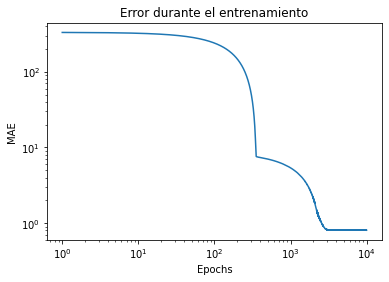

0.8655785804837349

In [ ]:
last_error = model.fit(
    X_train2, y_train2, max_epochs=1e4, threshold=0.01,
    learning_rate=1e-5, momentum=1e-2, decay=1e-7,
    error='mae', regularization='l2', lambdaa=2
)
model.plot_error_metric()
score(y_test, model.predict(X_test))

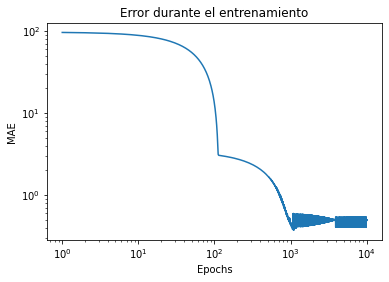

0.916271007929025

In [ ]:
last_error = model.fit(
    X_train3, y_train3, max_epochs=1e4, threshold=0.01,
    learning_rate=1e-5, momentum=1e-2, decay=1e-7,
    error='mae', regularization='l2', lambdaa=2
)
model.plot_error_metric()
score(y_test, model.predict(X_test))